<a href="https://colab.research.google.com/github/andre-sav/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/module4-makefeatures/LS_DS_124_Make_features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_

# Make features

Objectives
-  understand the purpose of feature engineering
-  work with strings in pandas
- work with dates and times in pandas

Links
- [Feature Engineering](https://en.wikipedia.org/wiki/Feature_engineering)
- Python Data Science Handbook
  - [Chapter 3.10](https://jakevdp.github.io/PythonDataScienceHandbook/03.10-working-with-strings.html), Vectorized String Operations
  - [Chapter 3.11](https://jakevdp.github.io/PythonDataScienceHandbook/03.11-working-with-time-series.html), Working with Time Series

pandas documentation
- [to_datetime](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html)
- [Time/Date Components](https://pandas.pydata.org/pandas-docs/stable/timeseries.html#time-date-components) "You can access these properties via the `.dt` accessor"

# ASSIGNMENT

- Replicate the lesson code.

- Convert the `term` column from string to integer.

- Make a column named `loan_status_is_great`. It should contain the integer 1 if `loan_status` is "Current" or "Fully Paid." Else it should contain the integer 0.

- Make `last_pymnt_d_month` and `last_pymnt_d_year` columns.

In [0]:
import pandas as pd
import numpy as np

pd.set_option("display.max_rows", 500)
pd.set_option("display.max_columns", 500)

In [2]:
!wget https://resources.lendingclub.com/LoanStats_2018Q4.csv.zip
  
!unzip LoanStats_2018Q4.csv.zip

--2019-05-30 18:19:18--  https://resources.lendingclub.com/LoanStats_2018Q4.csv.zip
Resolving resources.lendingclub.com (resources.lendingclub.com)... 64.48.1.20
Connecting to resources.lendingclub.com (resources.lendingclub.com)|64.48.1.20|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘LoanStats_2018Q4.csv.zip’

LoanStats_2018Q4.cs     [                <=> ]  21.42M   808KB/s    in 28s     

2019-05-30 18:19:46 (797 KB/s) - ‘LoanStats_2018Q4.csv.zip’ saved [22458773]

Archive:  LoanStats_2018Q4.csv.zip
  inflating: LoanStats_2018Q4.csv    


In [8]:
!tail LoanStats_2018Q4.csv

"","","5600","5600","5600"," 36 months"," 13.56%","190.21","C","C1","","n/a","RENT","15600","Not Verified","Oct-2018","Current","n","","","credit_card","Credit card refinancing","836xx","ID","15.31","0","Aug-2012","0","","97","9","1","5996","34.5%","11","w","4816.58","4816.58","1130.71","1130.71","783.42","347.29","0.0","0.0","0.0","Apr-2019","190.21","May-2019","Apr-2019","0","","1","Individual","","","","0","0","5996","0","0","0","1","20","0","","0","2","3017","35","17400","1","0","0","3","750","4689","45.5","0","0","20","73","13","13","0","13","","20","","0","3","5","4","4","1","9","10","5","9","0","0","0","0","100","25","1","0","17400","5996","8600","0","","","","","","","","","","","","N","","","","","","","","","","","","","","","N","","","","","",""
"","","23000","23000","23000"," 36 months"," 15.02%","797.53","C","C3","Tax Consultant","10+ years","MORTGAGE","75000","Source Verified","Oct-2018","Charged Off","n","","","debt_consolidation","Debt consolidation","352xx","AL","20.95

In [10]:
loans_df = pd.read_csv('LoanStats_2018Q4.csv', skiprows=1, skipfooter=2)

loans_df.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,10000,10000,10000.0,36 months,10.33%,324.23,B,B1,NaN,< 1 year,MORTGAGE,280000.0,Not Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,974xx,OR,6.15,2,Jan-1996,0,18.0,NaN,14,0,9082,38%,23,w,9279.39,9279.39,964.08,964.08,720.61,243.47,0.0,0.0,0.0,Apr-2019,324.23,Apr-2019,Apr-2019,0,NaN,1,Individual,NaN,NaN,NaN,0,671,246828,1,3,2,3,1.0,48552,62.0,1,3,4923,46.0,23900,2,7,1,7,17631.0,11897.0,43.1,0,0,158.0,275,11,1,1,11.0,NaN,11.0,NaN,0,3,4,7,7,10,9,11,4,14,0.0,0,0,4,91.3,28.6,0,0,367828,61364,20900,54912,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,9600,9600,9600.0,36 months,12.98%,323.37,B,B5,NaN,NaN,MORTGAGE,35704.0,Not Verified,Dec-2018,Current,n,NaN,NaN,home_improvement,Home improvement,401xx,KY,0.84,0,Nov-2003,0,69.0,NaN,5,0,748,11.5%,23,w,8934.25,8934.25,994.35,994.35,665.75,328.60,0.0,0.0,0.0,Apr-2019,323.37,May-2019,Apr-2019,0,NaN,1,Individual,NaN,NaN,NaN,0,0,748,0,0,0,0,44.0,0,NaN,0,3,748,12.0,6500,0,0,1,3,150.0,3452.0,17.8,0,0,181.0,100,13,13,0,16.0,NaN,3.0,NaN,0,1,1,2,2,16,5,7,1,5,0.0,0,0,0,95.5,0.0,0,0,6500,748,4200,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,4000,4000,4000.0,36 months,23.40%,155.68,E,E1,Security,3 years,RENT,90000.0,Source Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,070xx,NJ,26.33,0,Sep-2006,4,59.0,NaN,15,0,5199,19.2%,20,w,3762.39,3762.39,459.24,459.24,237.61,221.63,0.0,0.0,0.0,Apr-2019,155.68,Apr-2019,Apr-2019,0,NaN,1,Individual,NaN,NaN,NaN,0,0,66926,5,4,3,4,5.0,61727,86.0,6,11,1353,68.0,27100,4,0,4,15,4462.0,201

In [11]:
loans_df.dtypes

id                                            float64
member_id                                     float64
loan_amnt                                       int64
funded_amnt                                     int64
funded_amnt_inv                               float64
term                                           object
int_rate                                       object
installment                                   float64
grade                                          object
sub_grade                                      object
emp_title                                      object
emp_length                                     object
home_ownership                                 object
annual_inc                                    float64
verification_status                            object
issue_d                                        object
loan_status                                    object
pymnt_plan                                     object
url                         

In [13]:
loans_df.isnull().sum().sort_values(ascending=False)

id                                            128412
member_id                                     128412
url                                           128412
desc                                          128412
hardship_dpd                                  128411
deferral_term                                 128411
hardship_amount                               128411
hardship_start_date                           128411
hardship_end_date                             128411
payment_plan_start_date                       128411
hardship_length                               128411
orig_projected_additional_accrued_interest    128411
hardship_loan_status                          128411
hardship_reason                               128411
hardship_payoff_balance_amount                128411
hardship_last_payment_amount                  128411
hardship_type                                 128411
hardship_status                               128411
settlement_percentage                         

In [14]:
loans_df = loans_df.drop(['id', 'url', 'desc', 'member_id'], axis='columns')

loans_df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,10000,10000,10000.0,36 months,10.33%,324.23,B,B1,NaN,< 1 year,MORTGAGE,280000.0,Not Verified,Dec-2018,Current,n,debt_consolidation,Debt consolidation,974xx,OR,6.15,2,Jan-1996,0,18.0,NaN,14,0,9082,38%,23,w,9279.39,9279.39,964.08,964.08,720.61,243.47,0.0,0.0,0.0,Apr-2019,324.23,Apr-2019,Apr-2019,0,NaN,1,Individual,NaN,NaN,NaN,0,671,246828,1,3,2,3,1.0,48552,62.0,1,3,4923,46.0,23900,2,7,1,7,17631.0,11897.0,43.1,0,0,158.0,275,11,1,1,11.0,NaN,11.0,NaN,0,3,4,7,7,10,9,11,4,14,0.0,0,0,4,91.3,28.6,0,0,367828,61364,20900,54912,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,9600,9600,9600.0,36 months,12.98%,323.37,B,B5,NaN,NaN,MORTGAGE,35704.0,Not Verified,Dec-2018,Current,n,home_improvement,Home improvement,401xx,KY,0.84,0,Nov-2003,0,69.0,NaN,5,0,748,11.5%,23,w,8934.25,8934.25,994.35,994.35,665.75,328.60,0.0,0.0,0.0,Apr-2019,323.37,May-2019,Apr-2019,0,NaN,1,Individual,NaN,NaN,NaN,0,0,748,0,0,0,0,44.0,0,NaN,0,3,748,12.0,6500,0,0,1,3,150.0,3452.0,17.8,0,0,181.0,100,13,13,0,16.0,NaN,3.0,NaN,0,1,1,2,2,16,5,7,1,5,0.0,0,0,0,95.5,0.0,0,0,6500,748,4200,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,4000,4000,4000.0,36 months,23.40%,155.68,E,E1,Security,3 years,RENT,90000.0,Source Verified,Dec-2018,Current,n,debt_consolidation,Debt consolidation,070xx,NJ,26.33,0,Sep-2006,4,59.0,NaN,15,0,5199,19.2%,20,w,3762.39,3762.39,459.24,459.24,237.61,221.63,0.0,0.0,0.0,Apr-2019,155.68,Apr-2019,Apr-2019,0,NaN,1,Individual,NaN,NaN,NaN,0,0,66926,5,4,3,4,5.0,61727,86.0,6,11,1353,68.0,27100,4,0,4,15,4462.0,20174.0,7.9,0,0,147.0,118,2,2,0,2.0,NaN,0.0,NaN,0,5,7,9,9,8,11,12,7,15,0.

In [16]:
def remove_percent(percent):
  return float(percent.strip('%'))

loans_df['int_rate'] = loans_df['int_rate'].apply(remove_percent)

loans_df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,10000,10000,10000.0,36 months,10.33,324.23,B,B1,NaN,< 1 year,MORTGAGE,280000.0,Not Verified,Dec-2018,Current,n,debt_consolidation,Debt consolidation,974xx,OR,6.15,2,Jan-1996,0,18.0,NaN,14,0,9082,38%,23,w,9279.39,9279.39,964.08,964.08,720.61,243.47,0.0,0.0,0.0,Apr-2019,324.23,Apr-2019,Apr-2019,0,NaN,1,Individual,NaN,NaN,NaN,0,671,246828,1,3,2,3,1.0,48552,62.0,1,3,4923,46.0,23900,2,7,1,7,17631.0,11897.0,43.1,0,0,158.0,275,11,1,1,11.0,NaN,11.0,NaN,0,3,4,7,7,10,9,11,4,14,0.0,0,0,4,91.3,28.6,0,0,367828,61364,20900,54912,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,9600,9600,9600.0,36 months,12.98,323.37,B,B5,NaN,NaN,MORTGAGE,35704.0,Not Verified,Dec-2018,Current,n,home_improvement,Home improvement,401xx,KY,0.84,0,Nov-2003,0,69.0,NaN,5,0,748,11.5%,23,w,8934.25,8934.25,994.35,994.35,665.75,328.60,0.0,0.0,0.0,Apr-2019,323.37,May-2019,Apr-2019,0,NaN,1,Individual,NaN,NaN,NaN,0,0,748,0,0,0,0,44.0,0,NaN,0,3,748,12.0,6500,0,0,1,3,150.0,3452.0,17.8,0,0,181.0,100,13,13,0,16.0,NaN,3.0,NaN,0,1,1,2,2,16,5,7,1,5,0.0,0,0,0,95.5,0.0,0,0,6500,748,4200,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,4000,4000,4000.0,36 months,23.40,155.68,E,E1,Security,3 years,RENT,90000.0,Source Verified,Dec-2018,Current,n,debt_consolidation,Debt consolidation,070xx,NJ,26.33,0,Sep-2006,4,59.0,NaN,15,0,5199,19.2%,20,w,3762.39,3762.39,459.24,459.24,237.61,221.63,0.0,0.0,0.0,Apr-2019,155.68,Apr-2019,Apr-2019,0,NaN,1,Individual,NaN,NaN,NaN,0,0,66926,5,4,3,4,5.0,61727,86.0,6,11,1353,68.0,27100,4,0,4,15,4462.0,20174.0,7.9,0,0,147.0,118,2,2,0,2.0,NaN,0.0,NaN,0,5,7,9,9,8,11,12,7,15,0.0,0

In [18]:
loans_df.describe(exclude='number')

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,earliest_cr_line,revol_util,initial_list_status,last_pymnt_d,next_pymnt_d,last_credit_pull_d,application_type,verification_status_joint,sec_app_earliest_cr_line,hardship_flag,hardship_type,hardship_reason,hardship_status,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_loan_status,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date
count,128412,128412,128412,107465,116708,128412,128412,128412,128412,128412,128412,128412,128412,128412,128412,128256,128412,128252,122466,128411,128412,14848,16782,128412,1,1,1,1,1,1,1,128412,6,6,6
unique,2,7,35,43892,11,4,3,3,7,2,12,12,880,50,644,1074,2,7,3,9,2,3,573,2,1,1,1,1,1,1,1,2,2,2,3
top,36 months,A,A4,Teacher,10+ years,MORTGAGE,Not Verified,Oct-2018,Current,n,debt_consolidation,Debt consolidation,112xx,CA,Aug-2006,0%,w,Apr-2019,May-2019,Apr-2019,Individual,Not Verified,Aug-2006,N,INTEREST ONLY-3 MONTHS DEFERRAL,UNEMPLOYMENT,ACTIVE,Feb-2019,Apr-2019,Feb-2019,Late (16-30 days),N,Mar-2019,ACTIVE,Mar-2019
freq,88179,38011,9770,2090,38826,63490,58350,46305,120550,128411,70603,70603,1370,17879,1130,1132,114498,74937,67610,122720,111630,6360,155,128411,1,1,1,1,1,1,1,128406,5,4,3


In [19]:
loans_df.term.unique()

array([' 36 months', ' 60 months'], dtype=object)

In [0]:
loans_df['term'] = loans_df['term'].str.strip()



In [41]:
loans_df[loans_df['term'] == '60 months'].head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
4,30000,30000,30000.0,60 months,18.94,777.23,D,D2,Postmaster,10+ years,MORTGAGE,90000.0,Source Verified,Dec-2018,Current,n,debt_consolidation,Debt consolidation,713xx,LA,26.52,0,Jun-1987,0,71.0,75.0,13,1,12315,24.2%,44,w,29074.35,29074.35,2284.34,2284.34,925.65,1358.69,0.0,0.0,0.0,Apr-2019,777.23,Apr-2019,Apr-2019,0,NaN,1,Individual,NaN,NaN,NaN,0,1208,321915,4,4,2,3,3.0,87153,88.0,4,5,998,57.0,50800,2,15,2,10,24763.0,13761.0,8.3,0,0,163.0,378,4,3,3,4.0,NaN,4.0,NaN,0,2,4,4,9,27,8,14,4,13,0.0,0,0,6,95.0,0.0,1,0,372872,99468,15000,94072,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
6,23000,23000,23000.0,60 months,20.89,620.81,D,D4,Operator,5 years,RENT,68107.0,Source Verified,Dec-2018,Current,n,debt_consolidation,Debt consolidation,672xx,KS,0.52,0,Feb-1997,0,NaN,NaN,5,0,976,13%,10,w,22307.21,22307.21,1824.21,1824.21,692.79,1131.42,0.0,0.0,0.0,Apr-2019,620.81,Apr-2019,Apr-2019,1,NaN,1,Individual,NaN,NaN,NaN,0,2693,976,0,0,0,0,36.0,0,NaN,3,4,0,13.0,7500,2,2,4,4,195.0,3300.0,0.0,0,0,237.0,262,10,10,0,10.0,NaN,9.0,NaN,0,0,1,3,4,3,5,7,1,5,0.0,0,0,3,100.0,0.0,0,0,7500,976,3300,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
8,32075,32075,32075.0,60 months,11.80,710.26,B,B4,Nursing Supervisor,10+ years,MORTGAGE,150000.0,Not Verified,Dec-2018,Current,n,credit_card,Credit card refinancing,231xx,VA,22.21,0,Aug-2005,0,NaN,NaN,17,0,19077,32%,24,w,30878.75,30878.75,2099.24,2099.24,1196.25,902.99,0.0,0.0,0.0,Apr-2019,710.26,Apr-2019,Apr-2019,0,NaN,1,Individual,NaN,NaN,NaN,0,0,272667,1,4,1,1,9.0,37558,47.0,1,1,3910,41.0,59600,1,2,0,3,16039.0,10446.0,47.8,0,0,160.0,7

In [34]:
int_rate_below_10 = loans_df[loans_df['int_rate'] < 10].reset_index()
int_rate_below_10.head()

,index,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,43,1000,1000,975.0,36 months,6.46,30.64,A,A1,Service Consultant,3 years,MORTGAGE,49989.0,Not Verified,Dec-2018,Current,n,credit_card,Credit card refinancing,280xx,NC,15.43,0,Jul-2002,0,39.0,NaN,4,0,3257,88%,12,f,923.82,900.73,91.38000,89.10,76.18,15.20,0.0,0.0,0.0,Apr-2019,30.64,Apr-2019,Apr-2019,0,49.0,1,Individual,NaN,NaN,NaN,0,0,88884,1,1,0,0,75.0,2252,7.0,1,2,2941,14.0,3700,0,1,0,2,22221.0,59.0,98.0,0,0,75.0,197,2,2,2,16.0,58.0,16.0,45.0,4,1,2,1,4,1,2,9,2,4,0.0,0,0,1,33.3,100.0,0,0,160996,5509,3000,34806,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,60,18000,18000,18000.0,36 months,8.81,570.81,A,A5,Attorney-Adviser,3 years,RENT,100203.0,Not Verified,Dec-2018,Current,n,debt_consolidation,Debt consolidation,200xx,DC,12.30,0,Jan-2008,0,NaN,NaN,12,0,18443,38%,22,w,16674.33,16674.33,1699.21000,1699.21,1325.67,373.54,0.0,0.0,0.0,Apr-2019,570.81,Apr-2019,Apr-2019,0,NaN,1,Individual,NaN,NaN,NaN,0,0,294097,0,8,0,1,13.0,275654,117.0,0,2,10711,89.0,48500,1,0,0,3,24508.0,25057.0,42.4,0,0,76.0,131,16,13,0,16.0,NaN,13.0,NaN,0,2,2,3,5,15,4,7,2,12,0.0,0,0,0,100.0,0.0,0,0,283492,294097,43500,234992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,73,6000,6000,6000.0,36 months,6.46,183.79,A,A1,Senior manager,3 years,RENT,27000.0,Not Verified,Dec-2018,Current,n,credit_card,Credit card refinancing,951xx,CA,7.64,0,Aug-2004,0,68.0,NaN,4,0,4601,55.4%,6,w,5543.07,5543.07,534.15000,534.15,456.93,77.22,0.0,0.0,0.0,Mar-2019,183.79,Apr-2019,Apr-2019,0,68.0,1,Individual,NaN,NaN,NaN,0,0,4601,1,0,0,0,NaN,0,NaN,1,1,1929,55.0,8300,0,0,1,1,1150.0,2163.0,65.7,0,0,NaN,17

In [49]:
int_rate_below_10['int_rate'].iloc[4]

7.56

In [51]:
loans_df['emp_title'].value_counts(dropna=False).head()

NaN                 20947
Teacher              2090
Manager              1773
Registered Nurse      952
Driver                924
Name: emp_title, dtype: int64

In [53]:
loans_df.emp_title.isnull().sum()

20947

In [56]:
def clean_title(title):
  if isinstance(title, str):
    return title.strip()
  else: 
    return "Unknown"
  
loans_df['emp_title'] = loans_df['emp_title'].apply(clean_title)

loans_df['emp_title'].value_counts()

Unknown                                     20947
Teacher                                      2267
Manager                                      2022
Registered Nurse                             1054
Driver                                       1016
Supervisor                                    970
RN                                            749
Sales                                         637
General Manager                               583
Project Manager                               572
Office Manager                                569
Director                                      484
Owner                                         467
Truck Driver                                  434
Operations Manager                            431
Engineer                                      366
Nurse                                         355
Technician                                    352
Administrative Assistant                      346
Sales Manager                                 338


In [0]:
loans_df['emp_title_manager'] = loans_df['emp_title'].str.contains('Manager')

In [58]:
managers = loans_df[loans_df['emp_title_manager']==True]

managers['int_rate'].mode()

0    15.02
dtype: float64

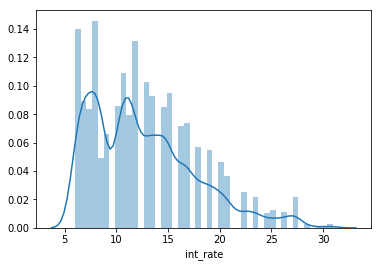

In [59]:
import seaborn as sns
sns.distplot(managers['int_rate'])

In [61]:
loans_df['issue_d'].head().values

array(['Dec-2018', 'Dec-2018', 'Dec-2018', 'Dec-2018', 'Dec-2018'],
      dtype=object)

In [62]:
loans_df['issue_d'] = pd.to_datetime(loans_df['issue_d'])

loans_df['issue_d'].head().values

array(['2018-12-01T00:00:00.000000000', '2018-12-01T00:00:00.000000000',
       '2018-12-01T00:00:00.000000000', '2018-12-01T00:00:00.000000000',
       '2018-12-01T00:00:00.000000000'], dtype='datetime64[ns]')

In [0]:
loans_df['issue_year'] = loans_df['issue_d'].dt.year

In [65]:
[col for col in loans_df if col.endswith('_d')]

['issue_d', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d']

In [0]:
loans_df['earliest_cr_line'] = pd.to_datetime(loans_df['earliest_cr_line'])
                            

In [74]:
(loans_df['issue_d']-loans_df['earliest_cr_line']).dt.days.sort_values(ascending=False)

16117     25171
60690     25141
17671     24990
24924     23710
12915     23710
68732     23621
25647     22980
19809     22249
117345    22188
42048     21854
72902     21854
30530     21580
29807     21519
37871     21519
81162     21489
115774    21458
86624     21458
105373    21367
53452     21123
113377    21092
93014     21092
5102      21033
40088     20850
33853     20788
74618     20758
36988     20729
53936     20727
5498      20698
63038     20546
101803    20484
18151     20423
118762    20393
20752     20392
19922     20333
12192     20333
33946     20333
103362    20331
109241    20211
69370     20181
60316     20150
69470     20028
90032     19997
104234    19997
23047     19967
9223      19937
57403     19937
72969     19937
85185     19906
45267     19876
72558     19846
19456     19814
91138     19784
89424     19784
76801     19754
40531     19754
97124     19753
65437     19723
79268     19693
58230     19693
120677    19692
29683     19692
69560     19662
56433   

In [76]:
loans_df.term.dtype

dtype('O')

In [0]:
loans_df['term'] = loans_df['term'].str.strip(' months').astype(int)

In [81]:
loans_df.term.dtype

dtype('int64')

In [83]:
loans_df.loan_status.unique()

array(['Current', 'Fully Paid', 'Late (16-30 days)', 'Late (31-120 days)',
       'In Grace Period', 'Charged Off', 'Default'], dtype=object)

In [0]:
# current/fully paid = 1 else = 0

def check_status(status):
  if status == 'Current' or status == 'Fully Paid':
    return 1
  else:
    return 0 

In [0]:
loans_df['loan_status_is_great'] = loans_df['loan_status'].apply(check_status)

In [99]:
loans_df['loan_status_is_great'].value_counts()

1    126287
0      2125
Name: loan_status_is_great, dtype: int64

In [0]:
loans_df.last_pymnt_d = pd.to_datetime(loans_df.last_pymnt_d)

In [88]:
loans_df.last_pymnt_d.dtype

dtype('<M8[ns]')

In [0]:
loans_df['last_pymnt_d_month'] = loans_df.last_pymnt_d.dt.month

In [103]:
loans_df.tail()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,emp_title_manager,issue_year,last_pymnt_d_month,last_pymnt_d_year,loan_status_is_great
128407,23000,23000,23000.0,36,15.02,797.53,C,C3,Tax Consultant,10+ years,MORTGAGE,75000.0,Source Verified,2018-10-01,Charged Off,n,debt_consolidation,Debt consolidation,352xx,AL,20.95,1,1985-08-01,2,22.0,NaN,12,0,22465,43.6%,28,w,0.00,0.00,1547.08,1547.08,1025.67,521.41,0.0,0.0,0.0,2018-12-01,797.53,NaN,Nov-2018,0,NaN,1,Individual,NaN,NaN,NaN,0,0,259658,4,2,3,3,6.0,18149,86.0,4,6,12843,56.0,51500,2,2,5,11,21638.0,26321.0,44.1,0,0,12.0,397,4,4,6,5.0,22.0,4.0,22.0,0,4,5,7,14,3,9,19,5,12,0.0,0,0,7,96.4,14.3,0,0,296500,40614,47100,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,False,2018,12.0,2018.0,0
128408,10000,10000,10000.0,36,15.02,346.76,C,C3,security guard,5 years,MORTGAGE,38000.0,Not Verified,2018-10-01,Current,n,debt_consolidation,Debt consolidation,443xx,OH,13.16,3,1982-07-01,0,6.0,NaN,11,0,5634,37.1%,16,w,8628.13,8628.13,2072.22,2072.22,1371.87,700.35,0.0,0.0,0.0,2019-04-01,346.76,May-2019,Apr-2019,0,NaN,1,Individual,NaN,NaN,NaN,0,155,77424,0,1,0,0,34.0,200,10.0,1,1,1866,42.0,15200,2,0,0,2,7039.0,4537.0,50.1,0,0,34.0,434,11,11,3,11.0,6.0,17.0,6.0,0,3,5,5,6,1,8,11,5,11,0.0,0,0,1,73.3,40.0,0,0,91403,9323,9100,2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,False,2018,4.0,2019.0,1
128409,5000,5000,5000.0,36,13.56,169.83,C,C1,Payoff Clerk,10+ years,MORTGAGE,35360.0,Not Verified,2018-10-01,Current,n,debt_consolidation,Debt consolidation,381xx,TN,11.30,1,2006-06-01,0,21.0,NaN,9,0,2597,27.3%,15,f,4300.52,4300.52,1015.21,1015.21,699.48,315.73,0.0,0.0,0.0,2

In [90]:
loans_df.last_pymnt_d_month.head()

0    4.0
1    4.0
2    4.0
3    4.0
4    4.0
Name: last_pymnt_d_month, dtype: float64

In [0]:
loans_df['last_pymnt_d_year'] =  loans_df.last_pymnt_d.dt.year

In [94]:
loans_df.last_pymnt_d_year.head()

0    2019.0
1    2019.0
2    2019.0
3    2019.0
4    2019.0
Name: last_pymnt_d_year, dtype: float64

In [102]:
loans_df.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       ...
       'settlement_status', 'settlement_date', 'settlement_amount',
       'settlement_percentage', 'settlement_term', 'emp_title_manager',
       'issue_year', 'last_pymnt_d_month', 'last_pymnt_d_year',
       'loan_status_is_great'],
      dtype='object', length=145)

In [0]:
loans_df.revol_util = loans_df.revol_util.fillna(0)

In [109]:
loans_df.revol_util.isnull().sum()

0

In [0]:
def remove_p(percent):
  return float(str(percent).strip('%'))

loans_df['revol_util'] = loans_df['revol_util'].apply(remove_p)

In [117]:
loans_df['revol_util'].head()

0    38.0
1    11.5
2    19.2
3    10.3
4    24.2
Name: revol_util, dtype: float64

In [122]:
top_20 = loans_df['emp_title'].value_counts().index.tolist()[:20]

20

In [0]:
def occupation(string):
  if string not in top_20:
    return 'Other'
  else:
    return string

In [130]:
loans_df['emp_title'] = loans_df['emp_title'].apply(occupation)

loans_df['emp_title'].head(20)

0     Unknown
1     Unknown
2       Other
3       Other
4       Other
5       Other
6       Other
7     Manager
8       Other
9     Unknown
10      Other
11      Other
12      Other
13    Unknown
14      Other
15      Other
16      Other
17      Other
18      Other
19      Other
Name: emp_title, dtype: object

# STRETCH OPTIONS

You can do more with the LendingClub or Instacart datasets.

LendingClub options:
- There's one other column in the dataframe with percent signs. Remove them and convert to floats. You'll need to handle missing values.
- Modify the `emp_title` column to replace titles with 'Other' if the title is not in the top 20. 
- Take initiatve and work on your own ideas!

Instacart options:
- Read [Instacart Market Basket Analysis, Winner's Interview: 2nd place, Kazuki Onodera](http://blog.kaggle.com/2017/09/21/instacart-market-basket-analysis-winners-interview-2nd-place-kazuki-onodera/), especially the **Feature Engineering** section. (Can you choose one feature from his bulleted lists, and try to engineer it with pandas code?)
- Read and replicate parts of [Simple Exploration Notebook - Instacart](https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-instacart). (It's the Python Notebook with the most upvotes for this Kaggle competition.)
- Take initiative and work on your own ideas!

You can uncomment and run the cells below to re-download and extract the Instacart data

In [0]:
# !wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz

In [0]:
# !tar --gunzip --extract --verbose --file=instacart_online_grocery_shopping_2017_05_01.tar.gz

In [0]:
# %cd instacart_2017_05_01